ASSIGNMENT:TIME_SERIES-2

1. What is meant by time-dependent seasonal components?

Time-dependent seasonal components refer to patterns or variations in a time series data that occur regularly and repeatedly at specific time points within each cycle of the series. These patterns are associated with specific time intervals, such as days, weeks, months, or seasons, and are known as seasonal effects.

However, in some cases, these seasonal effects may not remain constant over time. Time-dependent seasonal components take into account the fact that the amplitude or shape of the seasonal patterns can change as time progresses. This means that the magnitude or behavior of the seasonal effect may vary from one cycle to another.

For example, consider a retail store that experiences higher sales during the holiday season each year. The holiday season represents a seasonal component. However, the intensity or impact of this seasonal effect may vary from one year to another. Some years, the sales may be exceptionally high due to factors like promotions or increased customer demand, while in other years, the sales may be relatively lower. In this case, the seasonal component is time-dependent because it varies in strength or behavior over time.

Modeling time-dependent seasonal components in time series analysis is important to capture the changing dynamics and make accurate predictions or forecasts. Techniques such as seasonal decomposition of time series, autoregressive integrated moving average (ARIMA) models, or state space models with time-varying parameters can be used to account for and estimate these time-dependent seasonal components.

2. How can time-dependent seasonal components be identified in time series data?

Identifying time-dependent seasonal components in time series data typically involves analyzing the patterns and variations that occur at specific time intervals. Here are a few commonly used techniques to identify time-dependent seasonal components:

Visual inspection: Plotting the time series data and visually examining the plot can often reveal clear patterns and fluctuations that occur at regular time intervals. Look for consistent cycles, oscillations, or repeating patterns that suggest the presence of seasonal effects.

Autocorrelation function (ACF) and partial autocorrelation function (PACF): ACF and PACF plots can help identify the presence of seasonal patterns. Significant spikes or peaks at specific lags (time intervals) in the ACF and PACF plots indicate the potential presence of seasonal components.

Seasonal subseries plots: Creating seasonal subseries plots involves dividing the time series data into subseries based on the different seasons or time intervals. Each subseries is then plotted separately to visualize the patterns within each season and observe any changes across seasons.

Decomposition techniques: Decomposition methods, such as seasonal decomposition of time series (e.g., STL decomposition, X-12-ARIMA), can separate the time series data into trend, seasonal, and residual components. By analyzing the seasonal component, one can determine if the seasonal effects vary over time.

Statistical tests: Statistical tests, such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, can help assess the stationarity of the time series and identify if there are time-dependent seasonal effects.

It's important to note that identifying time-dependent seasonal components may require domain knowledge and a deep understanding of the data. Additionally, the specific techniques used can vary depending on the characteristics and nature of the time series. It's often beneficial to combine multiple approaches and techniques to gain a comprehensive understanding of the time-dependent seasonal components present in the data.

In [2]:
# SAMPLE SARIMAX MODEL

               Value
2010-01-31  0.176405
2010-02-28  1.050117
2010-03-31  1.850127
2010-04-30  2.254392
2010-05-31  1.959211
...              ...
2017-12-31  0.030253
2018-01-31  0.970747
2018-02-28  2.158385
2018-03-31  2.734641
2018-04-30  3.040199

[100 rows x 1 columns]


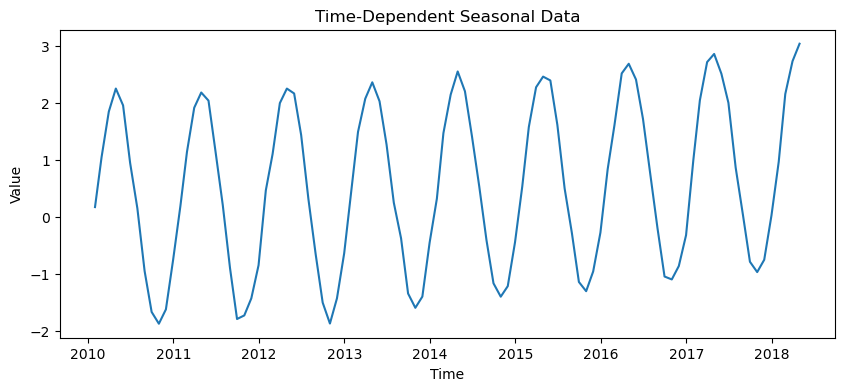

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.85971D-02    |proj g|=  3.25924D+00

At iterate    5    f= -3.72742D-01    |proj g|=  6.99581D-01

At iterate   10    f= -3.86833D-01    |proj g|=  1.63198D-01

At iterate   15    f= -3.92062D-01    |proj g|=  2.96883D-02

At iterate   20    f= -3.93421D-01    |proj g|=  6.95972D-02

At iterate   25    f= -4.05265D-01    |proj g|=  3.64114D-01

At iterate   30    f= -4.13757D-01    |proj g|=  1.16686D-02

At iterate   35    f= -4.15861D-01    |proj g|=  1.35520D-02

At iterate   40    f= -4.16087D-01    |proj g|=  2.69649D-04

At iterate   45    f= -4.16149D-01    |proj g|=  1.74584D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

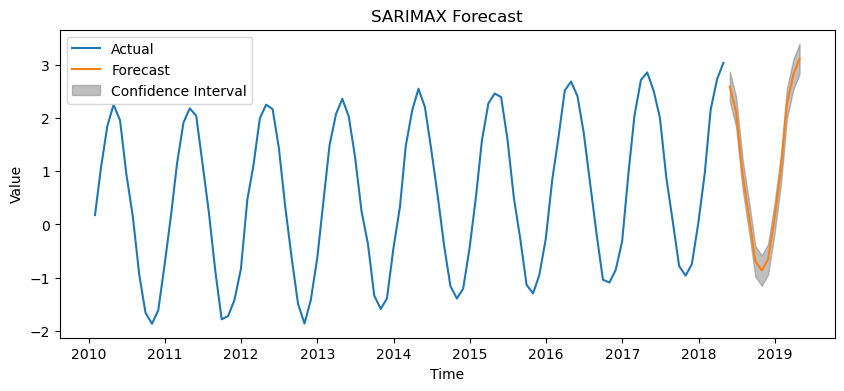

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate synthetic time-dependent seasonal data
np.random.seed(0)
index = pd.date_range(start='2010-01-01', periods=100, freq='M')
seasonal_component = np.sin(2 * np.pi * np.arange(100) / 12)  # Monthly seasonal component
trend_component = np.linspace(0, 1, 100)  # Trend component
noise = np.random.normal(0, 0.1, 100)  # Noise
data = trend_component + 2 * seasonal_component + noise
df = pd.DataFrame(data, index=index, columns=['Value'])
print(df)

# Visualize the synthetic data
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value'])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time-Dependent Seasonal Data')
plt.show()

# Perform SARIMAX modeling
model = SARIMAX(df['Value'], order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the next 12 periods
forecast = results.get_forecast(steps=12)

# Get confidence intervals for the forecast
forecast_ci = forecast.conf_int()

# Visualize the forecast
plt.figure(figsize=(10, 4))
plt.plot(df.index, df['Value'], label='Actual')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.5,
                 label='Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMAX Forecast')
plt.legend()
plt.show()


3. What are the factors that can influence time-dependent seasonal components?

Calendar Effects: Calendar effects refer to events or holidays that occur regularly at specific times throughout the year. Examples include Christmas, New Year's, Thanksgiving, Easter, or seasonal sales events. These calendar events can significantly impact seasonal patterns.

Weather Patterns: Weather conditions can have a pronounced effect on certain industries or activities, leading to seasonal variations. For example, the demand for heating systems tends to increase during colder months, and outdoor activities like tourism or agriculture may be influenced by specific weather conditions.

Cultural and Social Factors: Cultural and social factors can influence seasonal patterns in various ways. For instance, cultural festivals, traditions, or vacation periods may result in seasonal fluctuations. Consumer behavior and spending patterns during certain periods, such as back-to-school shopping or summer vacations, can also affect seasonal components.

Economic Factors: Economic factors, such as business cycles or economic conditions, can impact seasonal patterns. For example, industries like retail, tourism, or construction often experience seasonal fluctuations based on economic factors like consumer spending, business investments, or tourist arrivals.

Supply and Demand Dynamics: Seasonal variations can be influenced by supply and demand dynamics within specific industries or sectors. For instance, the agricultural sector experiences different patterns based on planting and harvesting seasons, while the fashion industry may have seasonal trends based on changing styles and preferences.

Natural Phenomena: Certain natural phenomena, such as migration patterns of animals, bird migration, or flowering seasons in plants, can result in observable seasonal components in ecological or environmental data.

4.  How are autoregression models used in time series analysis and forecasting?


Autoregression models, also known as AR models, are used in time series analysis and forecasting to capture the relationship between an observation and a lagged version of itself. They are based on the idea that the current value of a time series can be predicted by its past values.

Here's how autoregression models are used in time series analysis and forecasting:

Autoregressive Model Order Selection:

The first step is to determine the appropriate order of the autoregressive model, denoted as AR(p), where "p" represents the number of lagged observations to consider.
Model order selection techniques such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) can be used to find the optimal number of lagged observations.
Model Training:

Once the order of the autoregressive model is determined, the model is trained on historical time series data.
The training process involves estimating the coefficients of the autoregressive terms using techniques like least squares or maximum likelihood estimation.
The lagged observations from the historical data are used as predictors, and the current observation is used as the target variable.
Model Validation and Evaluation:

After training, the performance of the autoregressive model is evaluated using validation techniques such as hold-out validation or cross-validation.
Common evaluation metrics include mean squared error (MSE), root mean squared error (RMSE), or the coefficient of determination (R-squared).
Forecasting:

Once the autoregressive model is validated, it can be used for forecasting future values of the time series.
To make forecasts, the model utilizes the lagged observations from the historical data and applies the estimated coefficients to predict future values.
The forecasted values can be obtained for one-step ahead predictions or for multiple steps into the future.
Autoregressive models are suitable for time series data where the current value depends on its past values. They provide a straightforward approach to capturing the temporal dependencies within a time series. However, it's important to note that autoregressive models assume that the underlying time series is stationary or can be made stationary through differencing. Non-stationary time series may require additional techniques such as differencing or combining autoregressive models with other models like moving average (MA) or integrated (ARIMA) models to capture more complex dynamics.

5. How do you use autoregression models to make predictions for future time points?

Autoregression models are used to make predictions for future time points by utilizing the relationship between the current observation and its past values. Here's a step-by-step process on how autoregression models are used for future predictions:

Model Training:

Collect historical time series data, which includes past observations of the variable of interest.
Determine the appropriate order of the autoregressive model, denoted as AR(p), where "p" represents the number of lagged observations to consider.
Estimate the coefficients of the autoregressive terms using techniques like least squares or maximum likelihood estimation.
Split the historical data into a training set, which includes the observations up until a certain point, and a validation set to assess the model's performance.
Model Validation:

Validate the autoregressive model's performance using the validation set.
Calculate evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or the coefficient of determination (R-squared) to assess how well the model fits the validation data.
Forecasting:

Once the autoregressive model is validated, it can be used for future predictions.
To make predictions, obtain the most recent "p" observations from the historical data to serve as the lagged predictors for the first forecast.
Apply the estimated coefficients from the autoregressive model to predict the value for the next time point.
Shift the lagged predictors by one time step, discarding the oldest observation, and include the predicted value as the most recent observation.
Repeat this process iteratively to forecast future values for multiple time points.
Model Evaluation:

Evaluate the performance of the autoregressive model's predictions using additional test data or by comparing the predicted values to the actual values for the corresponding time points.
Calculate the evaluation metrics to assess the accuracy and reliability of the forecasts.
It's important to note that the accuracy of autoregression predictions heavily relies on the assumption that the underlying time series exhibits stationary behavior. If the time series exhibits trends, seasonality, or other non-stationary patterns, additional techniques such as differencing or combining autoregressive models with other models like moving average (MA) or integrated (ARIMA) models may be necessary to capture the complex dynamics and improve forecasting accuracy.

6.  What is a moving average (MA) model and how does it differ from other time series models?

A moving average (MA) model is a time series model that is used to explain the relationship between an observation and a linear combination of past error terms. It is a type of autoregressive integrated moving average (ARIMA) model and is specifically focused on the moving average component.

In an MA model, the value of a time series at a given point is modeled as a linear combination of the error terms from previous time points. The order of the MA model, denoted as MA(q), represents the number of lagged error terms considered in the model.

Here's how an MA model works:

Model Order Selection:

Determine the appropriate order of the MA model, denoted as MA(q), where "q" represents the number of lagged error terms to consider.
Model order selection techniques such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) can be used to find the optimal number of lagged error terms.
Model Training:

Estimate the coefficients of the MA terms using techniques like maximum likelihood estimation or least squares.
The error terms are typically assumed to be normally distributed with zero mean and constant variance.
Model Evaluation and Validation:

Validate the MA model's performance using evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or the coefficient of determination (R-squared).
Assess the model's goodness of fit and accuracy in capturing the patterns and dynamics of the time series.
Forecasting:

Use the trained MA model to make predictions for future time points.
To make forecasts, the model utilizes the past error terms and applies the estimated coefficients to predict future values.
The forecasted values can be obtained for one-step ahead predictions or for multiple steps into the future.
Compared to other time series models, the MA model differs in that it focuses on modeling the moving average component of a time series. It captures the relationship between the observed values and the past error terms, assuming that the current value is influenced by the weighted sum of past errors. In contrast, autoregressive (AR) models consider the relationship between the current value and past observed values, while ARIMA models incorporate both autoregressive and moving average components along with differencing to handle non-stationary time series.

The choice between using an MA model or other time series models depends on the specific characteristics of the data and the underlying patterns that need to be captured. It is common to analyze the autocorrelation and partial autocorrelation functions of the time series to determine the appropriate model to apply.

7.  What is a mixed ARMA model and how does it differ from an AR or MA model?

A mixed autoregressive moving average (ARMA) model is a type of time series model that combines both autoregressive (AR) and moving average (MA) components to capture the patterns and dynamics of a time series. It is a more flexible model that can handle both autocorrelation and moving average effects.

An ARMA model of order (p, q) includes p autoregressive terms (AR(p)) and q moving average terms (MA(q)). The AR component describes the relationship between an observation and a linear combination of past observed values, while the MA component models the relationship between an observation and a linear combination of past error terms.

Here's how a mixed ARMA model works:

Model Order Selection:

Determine the appropriate orders for the AR and MA components, denoted as AR(p) and MA(q), respectively.
Model order selection techniques such as the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) can be used to find the optimal values for p and q.
Model Training:

Estimate the coefficients of the AR and MA terms using techniques like maximum likelihood estimation or least squares.
The AR terms represent the weights assigned to the lagged observed values, while the MA terms represent the weights assigned to the lagged error terms.
Model Evaluation and Validation:

Validate the ARMA model's performance using evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), or the coefficient of determination (R-squared).
Assess the model's goodness of fit and accuracy in capturing the patterns and dynamics of the time series.
Forecasting:

Use the trained ARMA model to make predictions for future time points.
To make forecasts, the model utilizes both the past observed values and the past error terms to predict future values.
The forecasted values can be obtained for one-step ahead predictions or for multiple steps into the future.
Compared to standalone AR or MA models, the mixed ARMA model combines both components to capture the autocorrelation and moving average effects simultaneously. This allows the model to handle a broader range of time series patterns and dynamics. The choice between using an AR, MA, or ARMA model depends on the specific characteristics of the data and the underlying patterns that need to be captured. It is common to analyze the autocorrelation and partial autocorrelation functions of the time series to determine the appropriate model to apply.